In [1]:
import warnings, scipy
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import nbinom
import matplotlib as mpl
from sklearn.feature_selection import chi2
from scipy import stats
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# <center> Analysis and figures plotting <hr/>

In [2]:
dataframe = pd.read_excel('Schistosomiasis_count_data.xlsx') # getting data

In [3]:
dataframe.columns

Index(['ID_Number', 'Age', 'Sex', 'Class', 'Community', 'S_haematobium',
       'S_mansoni', 'Parent_Occupation', 'Pipe_borne', 'Tanker_treated',
       'Tanker_Untreated', 'River_Stream', 'Well_Borehole'],
      dtype='object')

In [4]:
water_sources = ['Pipe_borne', 'Tanker_treated', 'Tanker_Untreated', 'River_Stream', 'Well_Borehole']

In [5]:
dataframe[water_sources] = dataframe[water_sources].astype(int)

In [6]:
parent_occupation_dummies = pd.get_dummies(dataframe.Parent_Occupation).astype(int)
dataframe = pd.concat([dataframe, parent_occupation_dummies], axis='columns')

In [7]:
# Assigning numerical values to categorical values

dataframe['Sex'], uniques = pd.factorize(dataframe['Sex'])
dataframe['Class'], uniques = pd.factorize(dataframe['Class'])
dataframe['Community'], uniques = pd.factorize(dataframe['Community'])
dataframe['Parent_Occupation'], uniques = pd.factorize(dataframe['Parent_Occupation'])

In [8]:
dataframe['Schistosomiasis'] = dataframe['S_haematobium'] + dataframe['S_mansoni']

In [9]:
dataframe

,ID_Number,Age,Sex,Class,Community,S_haematobium,S_mansoni,Parent_Occupation,Pipe_borne,Tanker_treated,Tanker_Untreated,River_Stream,Well_Borehole,Farming,Fishing,Others,Schistosomiasis
0,AB003,7,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,AB005,7,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
2,AB006,9,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0
3,AB012,9,0,2,0,0,0,0,0,0,0,1,0,1,0,0,0
4,AB017,12,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,TP128,11,1,6,11,0,0,0,0,0,1,0,0,1,0,0,0
1341,TP129,12,0,6,11,4,0,0,0,0,0,0,0,1,0,0,4
1342,TP130,12,1,6,11,0,0,0,0,0,0,0,0,1,0,0,0
1343,TP131,9,0,6,11,0,0,0,0,0,1,0,0,1,0,0,0


In [10]:
# saving numeric data for analysis in R
# uncomment the systax below to save the data

#dataframe.to_excel('Dataframe.xlsx')

## Data Desciption

* 1345 participants
* 635 males and 710 females
* Class range (Nursery - Junior High 3)
* Age range (4 - 21)
* 12 communities
* Parent's Occupation group - Farming, Fishing and Others
* Water sources are pipe borne, tanker (treated), tanker (untreated), river/stream, well/borehore

In [11]:
#Number of positive individuals

positive_df = dataframe[dataframe['Schistosomiasis'] > 0]
print('The number of positive individuals are ', positive_df.shape[0])
print('The percentage of the number of positives is ', round(positive_df.shape[0]/dataframe.shape[0]*100, 1),'%')
print('The percentage of the number of negatives is ', 100 - round(positive_df.shape[0]/dataframe.shape[0]*100, 1),'%')

The number of positive individuals are  80
The percentage of the number of positives is  5.9 %
The percentage of the number of negatives is  94.1 %


In [12]:
# Schistosomiasis data description (for both negatives and positives)

dataframe.describe()['Schistosomiasis']

count    1345.00000
mean        1.98513
std        16.93382
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max       296.00000
Name: Schistosomiasis, dtype: float64

In [13]:
# Number of positives description

print(positive_df.describe()['Schistosomiasis'])
print('')
print('The variance of the schistosomiasis positive counts is ', positive_df['Schistosomiasis'].var())

count     80.000000
mean      33.375000
std       61.786356
min        1.000000
25%        2.000000
50%        8.000000
75%       29.000000
max      296.000000
Name: Schistosomiasis, dtype: float64

The variance of the schistosomiasis positive counts is  3817.5537974683543


## Count Visualization

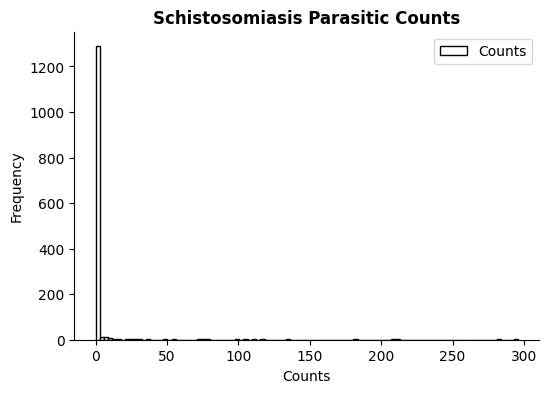

In [14]:
# Plotting schistosomiasis count distribution

plt.style.use('default')
plt.figure(figsize = (6, 4))
plt.hist(dataframe['Schistosomiasis'].values, label = 'Counts', bins = 100, color= 'white', 
        edgecolor='black')
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Schistosomiasis Parasitic Counts', weight='bold')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()
#plt.ylim(0,50)
#plt.xlim(-1,50)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


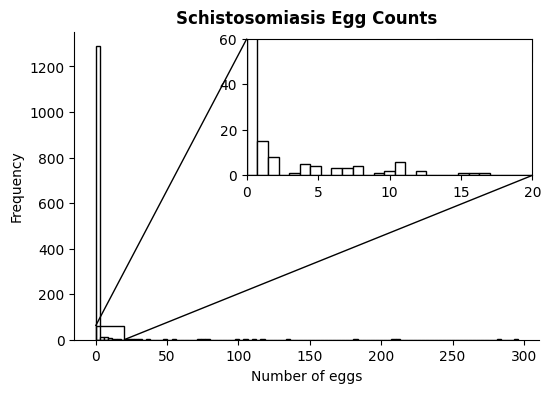

In [15]:
# Another visualization showing the schistosomiasis egg distribution 

fig, ax = plt.subplots(figsize=(6,4))
extent = (0, 100, 0, 50)
ax.hist(dataframe['Schistosomiasis'].values, label = 'Counts', bins = 100, color= 'white', edgecolor='black')
ax.set_xlabel('Number of eggs')
ax.set_ylabel('Frequency')
plt.title('Schistosomiasis Egg Counts', weight='bold')
ax.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
axins = zoomed_inset_axes(ax, 10, loc=1) 
axins.hist(dataframe['Schistosomiasis'].values, label = 'Counts', bins = 400, color='white', edgecolor='black')
axins.set_xlim(0, 20)
axins.set_ylim(0, 60)
plt.xticks(visible=True)
plt.yticks(visible=True)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0")
plt.draw()

plt.savefig('Figures\\figure1A.eps', format = 'EPS', bbox_inches = 'tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


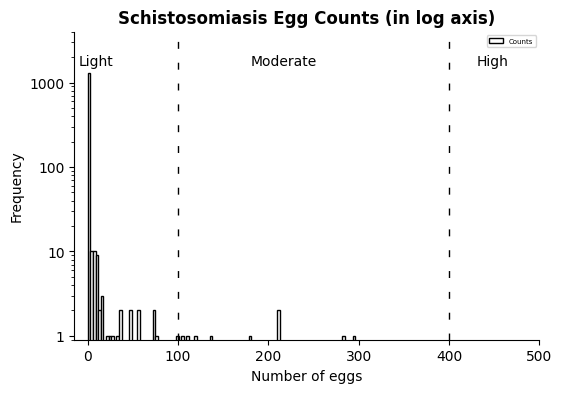

In [16]:
# Schistosomiasis distribution plot in log axis; also describing infection intensity regions.

plt.style.use('default')
plt.figure(figsize = (6,4))
plt.hist(dataframe['Schistosomiasis'], bins = 103, log = True, label = 'Counts', color = 'white', 
         edgecolor='black')
plt.xlabel('Number of eggs')
plt.xticks([0,100,200,300,400,500])
plt.yticks([0,1,10,100,1000],['0','1','10','100','1000'])
plt.ylabel('Frequency')
plt.title('Schistosomiasis Egg Counts (in log axis)', weight='bold')
plt.legend(loc = 'upper right', fontsize = "5")
plt.ylim(0.9,4000)
plt.grid(False)
plt.axvline(x = 100, color = 'black', lw = 1, linestyle = (0, (5, 10)))
plt.axvline(x = 400, color = 'black', lw = 1, linestyle = (0, (5, 10)))
plt.annotate('High', (430,1600), annotation_clip=False)
plt.annotate('Moderate', (180,1600), annotation_clip=False)
plt.annotate('Light',(-10,1600), annotation_clip=False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('Figures\\figure1B.eps', format = 'EPS', bbox_inches = 'tight')

plt.show()

## Grouping by infection intensity 

In [17]:
light_intensity = dataframe[(dataframe['Schistosomiasis'] > 0) & (dataframe['Schistosomiasis'] < 100)] # egg counts in 1-99 range
moderate_intensity = dataframe[(dataframe['Schistosomiasis'] > 100) & (dataframe['Schistosomiasis'] < 400)]  # egg counts in 100-399 range
high_intensity = dataframe[dataframe['Schistosomiasis'] >= 400]   # egg counts in 400 and above range

In [18]:
# summary of the desciption of light intensity counts
print(light_intensity.describe()['Schistosomiasis']) 
print('-----------------------------------------')
print('The variance is ', light_intensity['Schistosomiasis'].var())

count    71.000000
mean     14.338028
std      20.931141
min       1.000000
25%       2.000000
50%       6.000000
75%      12.000000
max      98.000000
Name: Schistosomiasis, dtype: float64
-----------------------------------------
The variance is  438.1126760563379


In [19]:
# summary of the desciption of moderate intensity counts
print(moderate_intensity.describe()['Schistosomiasis'])
print('-----------------------------------------')
print('The variance is ',moderate_intensity['Schistosomiasis'].var())

count      9.000000
mean     183.555556
std       72.629386
min      104.000000
25%      118.000000
50%      181.000000
75%      211.000000
max      296.000000
Name: Schistosomiasis, dtype: float64
-----------------------------------------
The variance is  5275.027777777779


In [20]:
# summary of the desciption of high intensity counts
print(high_intensity.describe()['Schistosomiasis'])
print('-----------------------------------------')
print('The variance is ', high_intensity['Schistosomiasis'].var())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Schistosomiasis, dtype: float64
-----------------------------------------
The variance is  nan


## Model's AIC values

In [21]:
# these AIC values were generated in R after model fitting
AIC_all5 = pd.read_excel('Model AIC and BIC values\AIC_all5.xlsx')
AIC_all10 = pd.read_excel('Model AIC and BIC values\AIC_all10.xlsx')
AIC_low5 = pd.read_excel('Model AIC and BIC values\AIC_low5.xlsx')
AIC_low10 = pd.read_excel('Model AIC and BIC values\AIC_low10.xlsx')

In [22]:
# rounding values to the nearest number
AIC_all_5 = np.round(AIC_all5['AIC'].values)
AIC_all_10 = np.round(AIC_all10['AIC'].values)
AIC_low_5 = np.round(AIC_low5['AIC'].values)
AIC_low_10 = np.round(AIC_low10['AIC'].values)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


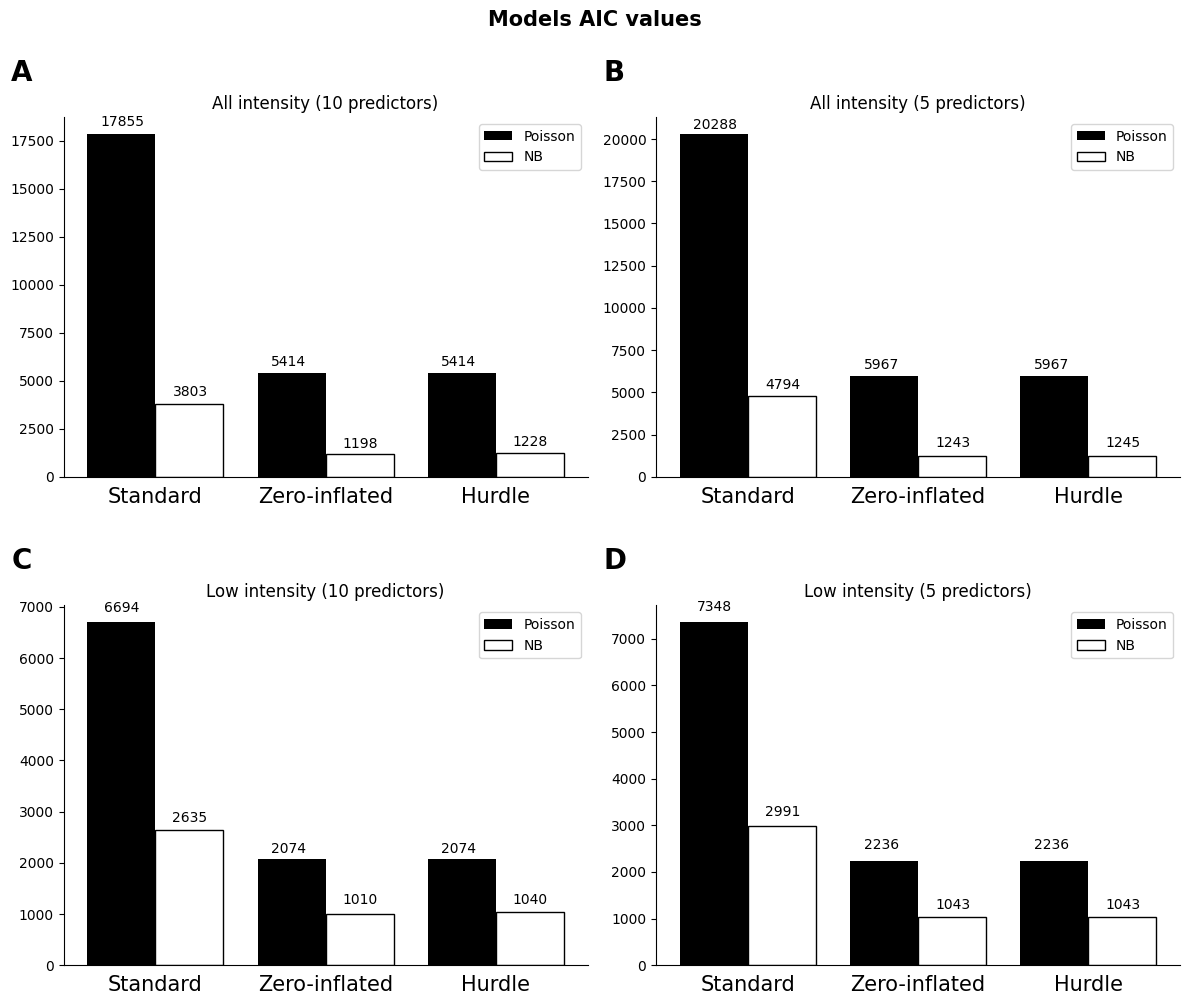

In [23]:
# A display of the model's aic values for comparison

plt.figure(figsize = (12,10))

plt.subplot(2,2,1)
plt.bar(np.arange(3), AIC_all_10[[0,2,4]], width = 0.4, label = 'Poisson', color = 'black')
plt.bar(np.arange(3) + 0.4, AIC_all_10[[1,3,5]], width = 0.4, label = 'NB', color='white', 
        edgecolor='black')
plt.xticks([0.2,1.2,2.2], ['Standard', 'Zero-inflated', 'Hurdle'], fontsize=15)
plt.title('All intensity (10 predictors)')
plt.annotate('17855', (-0.123,18300)) 
plt.annotate('5414', (0.88,5800))
plt.annotate('5414', (1.88,5800))
plt.annotate('3803', (0.3,4200))
plt.annotate('1198', (1.3,1500))
plt.annotate('1228', (2.3,1600))
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
plt.text(-0.1, 1.1, "A", transform=ax.transAxes, size=20, weight='bold') 


plt.subplot(2,2,2)
plt.bar(np.arange(3), AIC_all_5[[0,2,4]], width = 0.4, label = 'Poisson', color = 'black')
plt.bar(np.arange(3) + 0.4, AIC_all_5[[1,3,5]], width = 0.4, label = 'NB', color= 'white', 
        edgecolor='black')
plt.xticks([0.2,1.2,2.2], ['Standard', 'Zero-inflated', 'Hurdle'], fontsize=15)
plt.title('All intensity (5 predictors)') 
plt.annotate('20288', (-0.123,20600))
plt.annotate('5967', (0.88,6400)) 
plt.annotate('5967', (1.88,6400))
plt.annotate('4794', (0.3,5200))
plt.annotate('1243', (1.3,1800))
plt.annotate('1245', (2.3,1800))
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
plt.text(-0.1, 1.1, "B", transform=ax.transAxes, size=20, weight='bold') 

plt.subplot(2,2,3)
plt.bar(np.arange(3), AIC_low_10[[0,2,4]], width = 0.4, label = 'Poisson', color = 'black')
plt.bar(np.arange(3) + 0.4, AIC_low_10[[1,3,5]], width = 0.4, label = 'NB', color= 'white', 
        edgecolor='black')
plt.xticks([0.2,1.2,2.2], ['Standard', 'Zero-inflated', 'Hurdle'], fontsize=15)
plt.title('Low intensity (10 predictors)') # array([6694., 2635., 2074., 1010., 2074., 1040.])
plt.annotate('6694', (-0.1,6900))
plt.annotate('2074', (0.88,2200))
plt.annotate('2074', (1.88,2200)) 
plt.annotate('2635', (0.3,2800))
plt.annotate('1010', (1.3,1200))
plt.annotate('1040', (2.3,1200))
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
plt.text(-0.1, 1.1, "C", transform=ax.transAxes, size=20, weight='bold') 

plt.subplot(2,2,4)
plt.bar(np.arange(3), AIC_low_5[[0,2,4]], width = 0.4, label = 'Poisson', color = 'black')
plt.bar(np.arange(3) + 0.4, AIC_low_5[[1,3,5]], width = 0.4, label = 'NB', color = 'white', 
        edgecolor='black')
plt.xticks([0.2,1.2,2.2], ['Standard', 'Zero-inflated', 'Hurdle'], fontsize=15)
plt.title('Low intensity (5 predictors)') 
plt.annotate('7348', (-0.1,7600))
plt.annotate('2236', (0.88,2500)) 
plt.annotate('2236', (1.88,2500))
plt.annotate('2991', (0.3,3200))
plt.annotate('1043', (1.3,1200))
plt.annotate('1043', (2.3,1200))
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('none')
plt.text(-0.1, 1.1, "D", transform=ax.transAxes, size=20, weight='bold') 

plt.suptitle('Models AIC values', x=0.5, y = 1, fontweight = 'bold', fontsize = 15)
plt.tight_layout(h_pad = 3)

plt.savefig('Figures\\figure2.eps', format = 'EPS', bbox_inches = 'tight')

plt.show()

## Model's Observed and Expected Values

In [24]:
poisson_results = pd.read_excel("model predictions\\poisson_results.xlsx")
negbin_results = pd.read_excel("model predictions\\negbin_results.xlsx")
zip_results = pd.read_excel("model predictions\\zip_results.xlsx")
zinb_results = pd.read_excel("model predictions\\zinb_results.xlsx")
hurdlePoisson_results = pd.read_excel("model predictions\\hurdlePoisson_results.xlsx")
hurdleNB_results = pd.read_excel("model predictions\\hurdleNB_results.xlsx")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


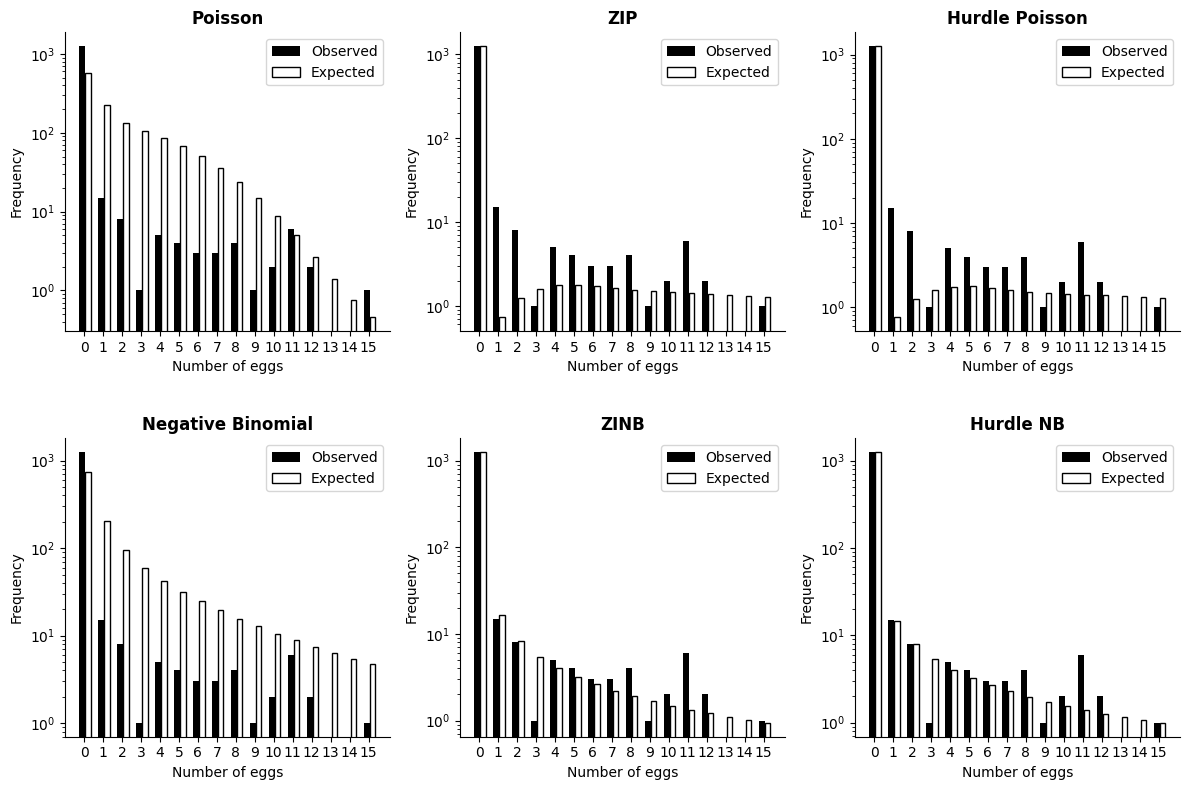

In [25]:
# Bar plot of the expected values plotted against the observed values


plt.style.use('default')
plt.figure(figsize = (12,8))

plt.subplot(2,3,1)
plt.bar(poisson_results['x'].values[:16] - 0.1, poisson_results['observed'].values[0:16], width = 0.3, color = 'black', 
        label = 'Observed', log = True)
plt.bar(poisson_results['x'].values[:16] + 0.2, poisson_results['expected'].values[0:16], width = 0.3, color='white', 
        edgecolor='black', label = 'Expected',
       log = True)
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Poisson', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks(np.arange(16))



plt.subplot(2,3,4)
plt.bar(negbin_results['x'].values[:16] - 0.1, negbin_results['observed'].values[0:16], width = 0.3, color = 'black', 
        label = 'Observed', log = True)
plt.bar(negbin_results['x'].values[:16] + 0.2, negbin_results['expected'].values[0:16], width = 0.3, color='white', 
        edgecolor='black', label = 'Expected',
       log = True)
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Negative Binomial', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks(np.arange(16))



plt.subplot(2,3,2)
plt.bar(zip_results['x'].values[:16] - 0.1, zip_results['observed'].values[0:16], width = 0.3, color = 'black', 
        label = 'Observed', log = True)
plt.bar(zip_results['x'].values[:16] + 0.2, zip_results['expected'].values[0:16], width = 0.3, color='white', 
        edgecolor='black', label = 'Expected',
       log = True)
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('ZIP', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks(np.arange(16))



plt.subplot(2,3,5)
plt.bar(zinb_results['x'].values[:16] - 0.1, zinb_results['observed'].values[0:16], width = 0.3, color = 'black', 
        label = 'Observed', log = True)
plt.bar(zinb_results['x'].values[:16] + 0.2, zinb_results['expected'].values[0:16], width = 0.3, color='white', 
        edgecolor='black', label = 'Expected',
       log = True)
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('ZINB', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks(np.arange(16))



plt.subplot(2,3,3)
plt.bar(hurdlePoisson_results['x'].values[:16] - 0.1, hurdlePoisson_results['observed'].values[0:16], width = 0.3, color = 'black', 
        label = 'Observed', log = True)
plt.bar(hurdlePoisson_results['x'].values[:16] + 0.2, hurdlePoisson_results['expected'].values[0:16], width = 0.3, color='white', 
        edgecolor='black', label = 'Expected',
       log = True)
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Hurdle Poisson', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks(np.arange(16))


plt.subplot(2,3,6)
plt.bar(hurdleNB_results['x'].values[:16] - 0.1, hurdleNB_results['observed'].values[0:16], width = 0.3, color = 'black', 
        label = 'Observed', log = True)
plt.bar(hurdleNB_results['x'].values[:16] + 0.2, hurdleNB_results['expected'].values[0:16], width = 0.3, color= 'white', 
        edgecolor='black', label = 'Expected',
       log = True)
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Hurdle NB', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks(np.arange(16))

plt.tight_layout(h_pad = 3)

plt.savefig('Figures\\figure6.eps', format = 'EPS', bbox_inches = 'tight')

plt.show()

## Rootograms

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


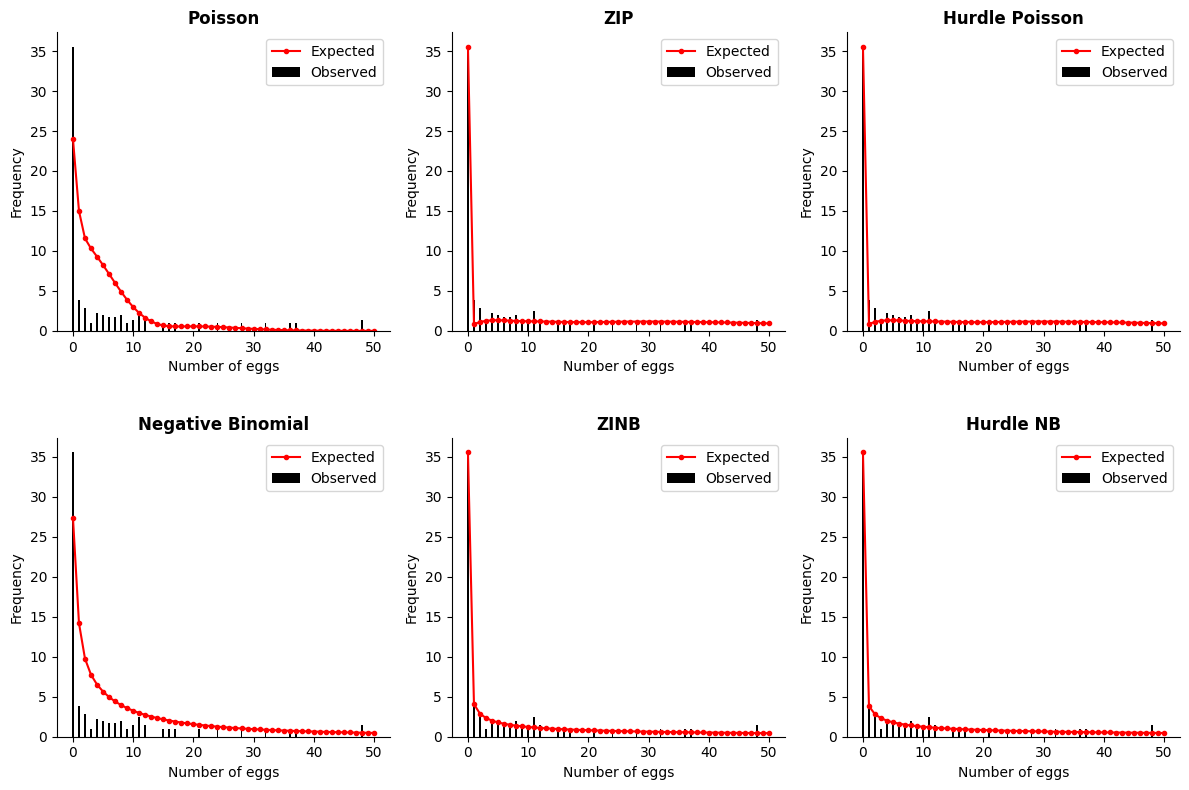

In [26]:
plt.figure(figsize = (12,8))

plt.subplot(2,3,1)
plt.bar(poisson_results['x'].values[:51], poisson_results['height'].values[0:51], width = 0.3, color = 'black', 
        label = 'Observed')
plt.plot(poisson_results['x'].values[:51], poisson_results['line'].values[0:51], '-o', color = 'red', markersize = 3, label = 'Expected')
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Poisson', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])



plt.subplot(2,3,4)
plt.bar(negbin_results['x'].values[:51], negbin_results['height'].values[0:51], width = 0.3, color = 'black', 
        label = 'Observed')
plt.plot(negbin_results['x'].values[:51], negbin_results['line'].values[0:51],  '-o', color = 'red', markersize = 3, label = 'Expected')
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Negative Binomial', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])



plt.subplot(2,3,2)
plt.bar(zip_results['x'].values[:51], zip_results['height'].values[0:51], width = 0.3, color = 'black', 
        label = 'Observed')
plt.plot(zip_results['x'].values[:51], zip_results['line'].values[0:51],  '-o', color = 'red', markersize = 3, label = 'Expected')
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('ZIP', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])



plt.subplot(2,3,5)
plt.bar(zinb_results['x'].values[:51], zinb_results['height'].values[0:51], width = 0.3, color = 'black', 
        label = 'Observed')
plt.plot(zinb_results['x'].values[:51], zinb_results['line'].values[0:51],  '-o', color = 'red', markersize = 3, label = 'Expected')
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('ZINB', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])



plt.subplot(2,3,3)
plt.bar(hurdlePoisson_results['x'].values[:51], hurdlePoisson_results['height'].values[0:51], width = 0.3, color = 'black', 
        label = 'Observed')
plt.plot(hurdlePoisson_results['x'].values[:51], hurdlePoisson_results['line'].values[0:51],  '-o', color = 'red', 
         markersize = 3, label = 'Expected')
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Hurdle Poisson', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])




plt.subplot(2,3,6)
plt.bar(hurdleNB_results['x'].values[:51], hurdleNB_results['height'].values[0:51], width = 0.3, color = 'black', 
        label = 'Observed')
plt.plot(hurdleNB_results['x'].values[:51], hurdleNB_results['line'].values[0:51], '-o', color = 'red', markersize = 3, 
         label = 'Expected')
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Hurdle NB', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])

plt.tight_layout(h_pad = 3)

plt.savefig('Figures\\figure3.eps', format = 'EPS', bbox_inches = 'tight')

plt.show()

In [27]:
#Getting the difference between the expected and observed values (Residuals)

poisson_residuals = poisson_results['expected'] - poisson_results['observed']
negbin_residuals = negbin_results['expected'] - negbin_results['observed']
zip_residuals = zip_results['expected'] - zip_results['observed']
zinb_residuals = zinb_results['expected'] - zinb_results['observed']
hurdlePoisson_residuals = hurdlePoisson_results['expected'] - hurdlePoisson_results['observed']
hurdleNB_residuals = hurdleNB_results['expected'] - hurdleNB_results['observed']

### Model's residuals plot

In [28]:
# The square root of the difference between the expected and observed values

poisson_r = np.array(list(map(lambda x: np.sqrt(x) if x>= 0 else -np.sqrt(abs(x)), poisson_residuals))).round(0)
negbin_r = np.array(list(map(lambda x: np.sqrt(x) if x>= 0 else -np.sqrt(abs(x)), negbin_residuals))).round(0)
zip_r = np.array(list(map(lambda x: np.sqrt(x) if x>= 0 else -np.sqrt(abs(x)), zip_residuals))).round(0)
zinb_r = np.array(list(map(lambda x: np.sqrt(x) if x>= 0 else -np.sqrt(abs(x)), zinb_residuals))).round(0)
hurdlePoisson_r = np.array(list(map(lambda x: np.sqrt(x) if x>= 0 else -np.sqrt(abs(x)), hurdlePoisson_residuals))).round(0)
hurdleNB_r = np.array(list(map(lambda x: np.sqrt(x) if x>= 0 else -np.sqrt(abs(x)), hurdleNB_residuals))).round(0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


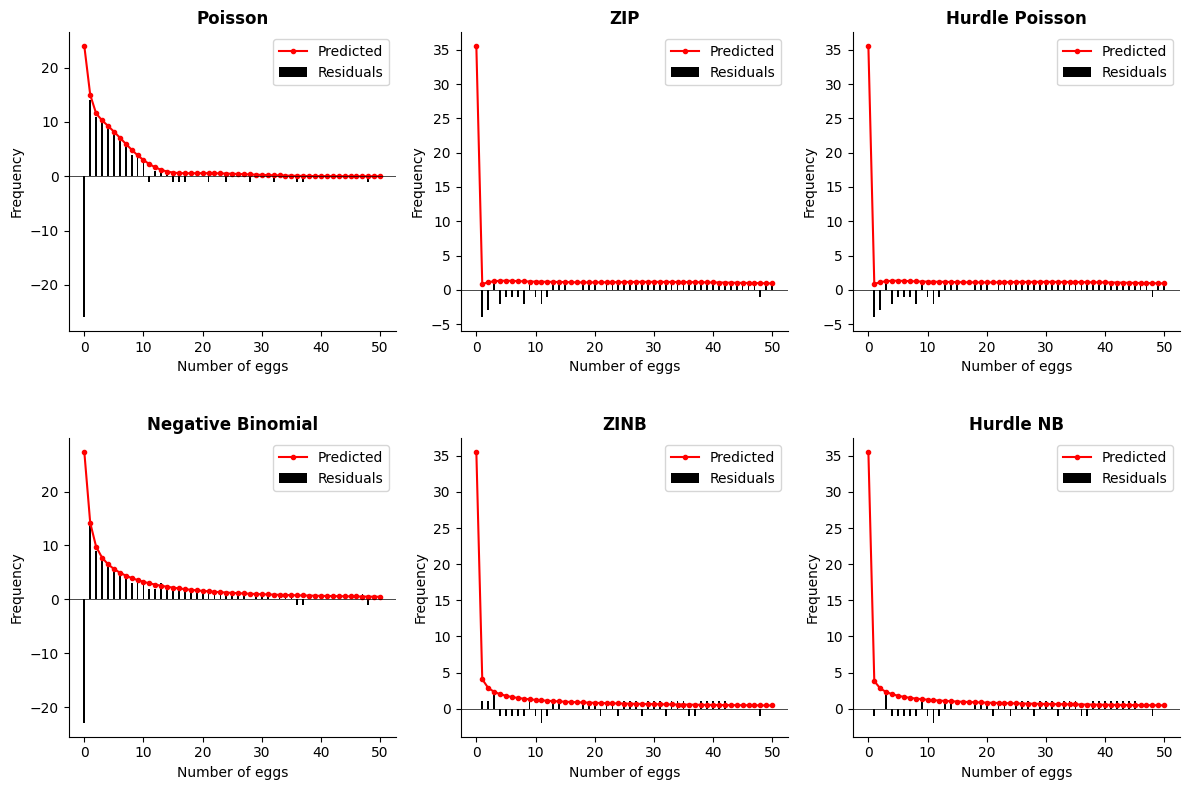

In [29]:
plt.figure(figsize = (12,8))

plt.subplot(2,3,1)
plt.bar(poisson_results['x'].values[:51], poisson_r[0:51]
        , width = 0.3, color = 'black', label = 'Residuals')
plt.plot(poisson_results['x'].values[:51], poisson_results['line'].values[0:51], 
         '-o', color = 'red', markersize = 3, label = 'Predicted')
plt.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Poisson', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])
plt.axhline(y=0, color='black', linewidth=0.5)
plt.legend()


plt.subplot(2,3,4)
plt.bar(negbin_results['x'].values[:51], negbin_r[0:51]
        , width = 0.3, color = 'black', label = 'Residuals')
plt.plot(negbin_results['x'].values[:51], negbin_results['line'].values[0:51], 
         '-o', color = 'red', markersize = 3, label = 'Predicted')
plt.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Negative Binomial', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])
plt.axhline(y=0, color='black', linewidth=0.5)
plt.legend()


plt.subplot(2,3,2)
plt.bar(zip_results['x'].values[:51], zip_r[0:51]
        , width = 0.3, color = 'black', label = 'Residuals')
plt.plot(zip_results['x'].values[:51], zip_results['line'].values[0:51], 
         '-o', color = 'red', markersize = 3, label = 'Predicted')
plt.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('ZIP', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])
plt.axhline(y=0, color='black', linewidth=0.5)
plt.legend()


plt.subplot(2,3,5)
plt.bar(zinb_results['x'].values[:51], zinb_r[0:51]
        , width = 0.3, color = 'black', label = 'Residuals')
plt.plot(zinb_results['x'].values[:51], zinb_results['line'].values[0:51], 
         '-o', color = 'red', markersize = 3, label = 'Predicted')
plt.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('ZINB', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])
plt.axhline(y=0, color='black', linewidth=0.5)
plt.legend()



plt.subplot(2,3,3)
plt.bar(hurdlePoisson_results['x'].values[:51], hurdlePoisson_r[0:51]
        , width = 0.3, color = 'black', label = 'Residuals')
plt.plot(hurdlePoisson_results['x'].values[:51], hurdlePoisson_results['line'].values[0:51], 
         '-o', color = 'red', markersize = 3, label = 'Predicted')
plt.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Hurdle Poisson', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])
plt.axhline(y=0, color='black', linewidth=0.5)
plt.legend()




plt.subplot(2,3,6)
plt.bar(hurdleNB_results['x'].values[:51], hurdleNB_r[0:51]
        , width = 0.3, color = 'black', label = 'Residuals')
plt.plot(hurdleNB_results['x'].values[:51], hurdleNB_results['line'].values[0:51], 
         '-o', color = 'red', markersize = 3, label = 'Predicted')
plt.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Hurdle NB', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])
plt.axhline(y=0, color='black', linewidth=0.5)
plt.legend()
plt.tight_layout(h_pad = 3)

plt.savefig('Figures\\figure4.eps', format = 'EPS', bbox_inches = 'tight')

plt.show()

## Measures of association

In [30]:
predictors = ['Age', 'Sex', 'Class','Community','''Parent's Occupation''', 'Pipe borne', 'Tanker (treated)', 'Tanker (untreated)', 'River/Stream', 'Well/Borehole']
count_values = [0.7573, 0.7334, 0.7292, 0.2034, 0.1098, 0.0735, 0.4507, 0.0007, 0.5719, 0.0008] # p-values of predictors relating to the counts outcome
zero_values = [0.0064, 0.7791, 0.0364, 0.1942, 0.3381, 0.2079, 0.1132, 0.0518, 0.2661, 0.6361] # p-values of predictors relating to the infection outcome (positive or negative)

In [31]:
d = {'Predictors': predictors, 'Infection status':zero_values, 'Infection intensity': count_values}

In [32]:
pd.DataFrame(data = d)

,Predictors,Infection status,Infection intensity
0,Age,0.0064,0.7573
1,Sex,0.7791,0.7334
2,Class,0.0364,0.7292
3,Community,0.1942,0.2034
4,Parent's Occupation,0.3381,0.1098
5,Pipe borne,0.2079,0.0735
6,Tanker (treated),0.1132,0.4507
7,Tanker (untreated),0.0518,0.0007
8,River/Stream,0.2661,0.5719
9,Well/Borehole,0.6361,0.0008


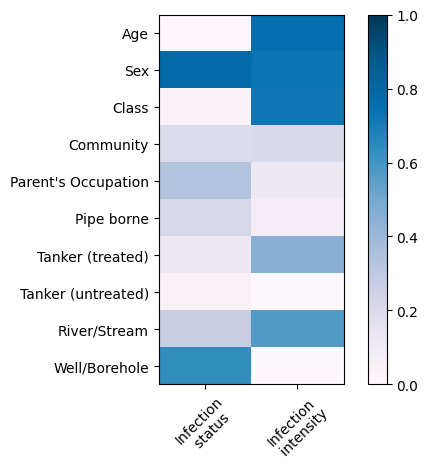

In [33]:
#plt.figure(figsize = (15,5))
plt.imshow(pd.DataFrame(data = d).iloc[:,1:], cmap = 'PuBu', interpolation='nearest', vmin = 0, vmax = 1, aspect = 0.4)
plt.colorbar()
plt.xticks([0,1],['Infection\n status', 'Infection\n intensity'], rotation = 45)
plt.yticks([i for i in range(0,10)],predictors)
#plt.tight_layout()
plt.show()

Here is the array
[[6.400e-03 7.573e-01]
 [7.791e-01 7.334e-01]
 [3.640e-02 7.292e-01]
 [1.942e-01 2.034e-01]
 [3.381e-01 1.098e-01]
 [2.079e-01 7.350e-02]
 [1.132e-01 4.507e-01]
 [5.180e-02 7.000e-04]
 [2.661e-01 5.719e-01]
 [6.361e-01 8.000e-04]]


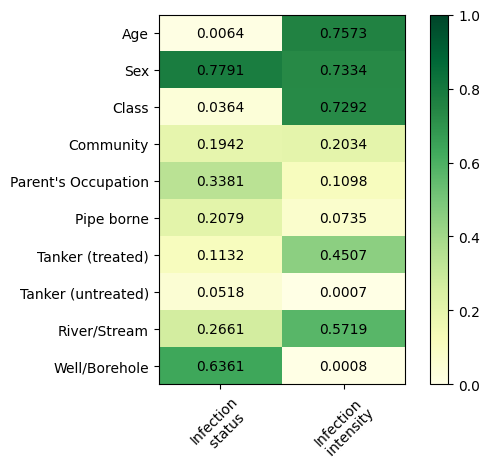

In [34]:
from matplotlib import pyplot
import numpy as np

grid = np.array([zero_values,count_values]).T
print('Here is the array')
print(grid)


plt.imshow(grid, cmap = "YlGn", interpolation='nearest', vmin = 0, vmax = 1, aspect = 0.3)
plt.colorbar()
for (j,i),label in np.ndenumerate(grid):
    plt.text(i,j,label,ha='center',va='center')
    
plt.xticks([0,1],['Infection\n status', 'Infection\n intensity'], rotation = 45)
plt.yticks([i for i in range(0,10)],predictors)

plt.savefig('Figures\\figure5.eps', format = 'EPS', bbox_inches = 'tight')
    
plt.show()